# Age & Gender Analysis

## Import

In [6]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import argparse
import sys
sys.path.append('../') # import를 위해 경로추가

from modules import Utility as U

## Load data

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--path_csv', type=str, default="../data/train/train.csv")
args = parser.parse_args('')

In [3]:
train_df = pd.read_csv(args.path_csv)
train_df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [4]:
train_df['gender_class'] = [U.GenderEncoder(s.capitalize()) for s in train_df['gender']]
train_df['age_class'] = [U.AgeEncoder(a) for a in train_df['age']]
train_df.head()

,id,gender,race,age,path,gender_class,age_class
0,000001,female,Asian,45,000001_female_Asian_45,1,1
1,000002,female,Asian,52,000002_female_Asian_52,1,1
2,000004,male,Asian,54,000004_male_Asian_54,0,1
3,000005,female,Asian,58,000005_female_Asian_58,1,1
4,000006,female,Asian,59,000006_female_Asian_59,1,1


## Age / Gender Plot
연령별 Data가 매우 불균형하며 각 연령별로 남성보다 여성이 많다.

Text(0.5, 1.0, 'age / gender plot')

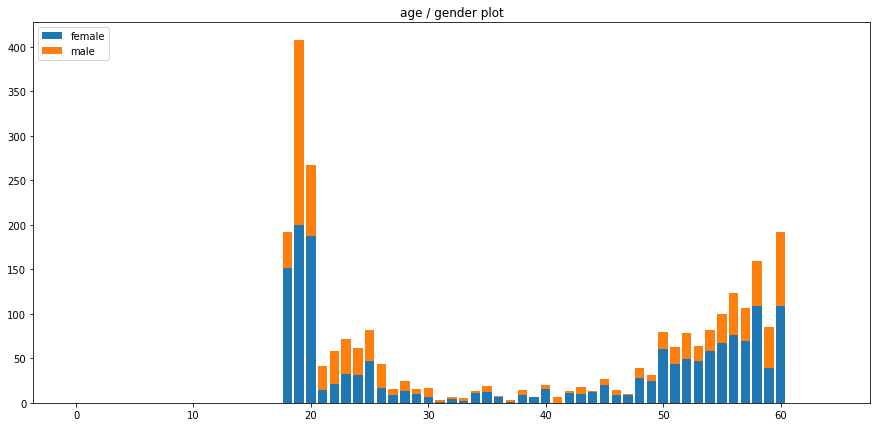

In [42]:
_, ax = plt.subplots(figsize=(15,7))
x = range(65)
y = np.zeros((2,65))
labels = list(train_df['gender'].unique())

for _, r in enumerate(zip(train_df['gender'],train_df['age'])) : y[labels.index(r[0]), r[1]] += 1

ax.bar(x, y[0], bottom=None, label=labels[0])
ax.bar(x, y[1], bottom=y[0], label=labels[1])
ax.legend(loc='upper left')
ax.set_title("age / gender plot")


## Age Class / Gender Plot
Age 분류 항목에 따라 다시 표현해보면 가장 마지막(60세 이상)의 데이터가 다른 데이터에 비해 부족하다.
그리고 전반적으로 여성의 데이터가 많다.

Text(0.5, 1.0, 'age_class / gender plot')

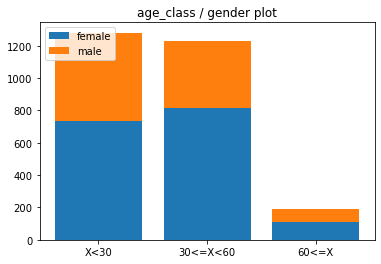

In [54]:
_, ax = plt.subplots()
x = U.AGE_CLASS
y = np.zeros((2,3))
labels = list(train_df['gender'].unique())

for _, r in enumerate(zip(train_df['gender'],train_df['age_class'])) : y[labels.index(r[0]), r[1]] += 1

ax.bar(x, y[0], bottom=None, label=labels[0])
ax.bar(x, y[1], bottom=y[0], label=labels[1])
ax.legend(loc='upper left')
ax.set_title("age_class / gender plot")
